In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from dask import dataframe as d
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2022/train.csv
/kaggle/input/tabular-playground-series-jan-2022/test.csv


In [3]:
df=pd.read_csv('../input/tabular-playground-series-jan-2022/train.csv')
test_df=pd.read_csv('../input/tabular-playground-series-jan-2022/test.csv')

In [4]:
df1=df

In [5]:
4,318,728,192


(4, 318, 728, 192)

In [6]:
df.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [7]:
test_df.isnull().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

In [8]:
df.shape

(26298, 6)

In [9]:
df.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [10]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [11]:
test_df.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [12]:
df['num_sold'].describe()

count    26298.000000
mean       387.533577
std        266.076193
min         70.000000
25%        190.000000
50%        315.000000
75%        510.000000
max       2884.000000
Name: num_sold, dtype: float64

<AxesSubplot:xlabel='num_sold'>

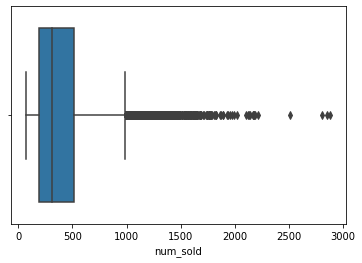

In [13]:
sns.boxplot(x=df['num_sold'])

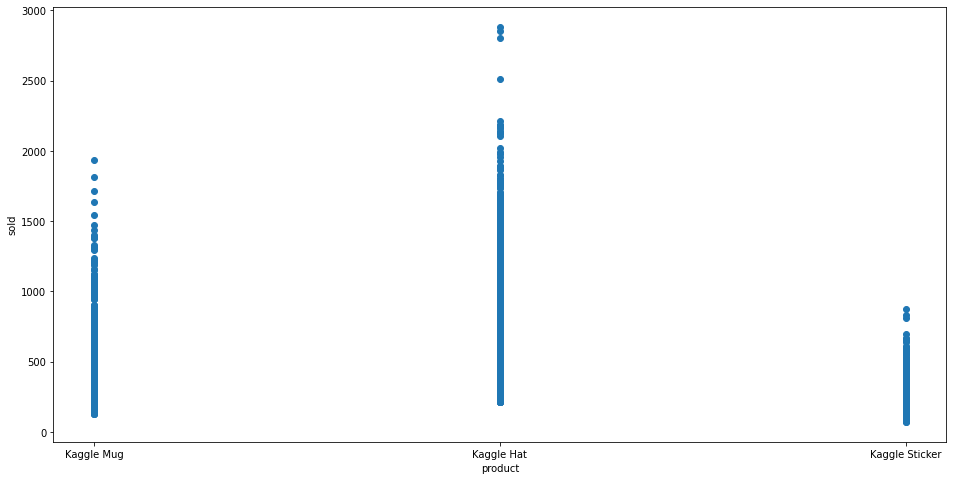

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['product'],df['num_sold'])
ax.set_xlabel('product')
ax.set_ylabel('sold')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


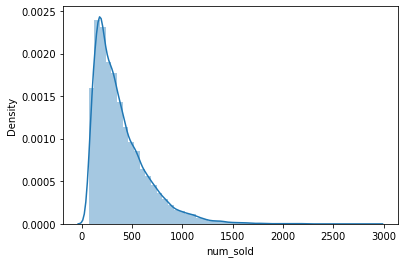

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create a distribution plot for rating
sns.distplot(df.num_sold)
plt.show()

In [16]:
df.num_sold.max()

2884

In [17]:
enc = OrdinalEncoder()
df[["country","store", "product"]] = enc.fit_transform(df[["country","store", "product"]])

In [18]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,0.0,0.0,1.0,329
1,1,2015-01-01,0.0,0.0,0.0,520
2,2,2015-01-01,0.0,0.0,2.0,146
3,3,2015-01-01,0.0,1.0,1.0,572
4,4,2015-01-01,0.0,1.0,0.0,911


In [19]:
enc = OrdinalEncoder()
test_df[["country","store", "product"]] = enc.fit_transform(test_df[["country","store", "product"]])

In [20]:
Q1 = df['num_sold'].quantile(0.25)
Q3 = df['num_sold'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

320.0


In [21]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['num_sold']))
print(z)

0        0.219992
1        0.497861
2        0.907778
3        0.693297
4        1.967393
           ...   
26293    1.636654
26294    0.516905
26295    2.316923
26296    3.959341
26297    0.001753
Name: num_sold, Length: 26298, dtype: float64


In [22]:
threshold = 3
print(np.where(z > 3))

(array([   10,    16,    28,    46,    64,   442,   550,   568,   676,
         694,   802,   820,   928,   946,  1054,  1072,  1090,  1180,
        1198,  1306,  1324,  1432,  1450,  1558,  1576,  1666,  1684,
        1702,  1720,  1738,  1756,  1774,  1792,  1810,  1816,  1828,
        1846,  1936,  1954,  2062,  2080,  2188,  2206,  2224,  2242,
        2260,  2314,  2332,  2422,  2440,  2458,  2494,  2512,  2548,
        2566,  2584,  2638,  2674,  2692,  2710,  2944,  2962,  6472,
        6490,  6508,  6520,  6525,  6526,  6532,  6538,  6541,  6543,
        6544,  6550,  6562,  6568,  6580,  6598,  6604,  6616,  6976,
        7102,  7120,  7246,  7372,  7480,  7498,  7606,  7624,  7732,
        7750,  7876,  7984,  8002,  8110,  8128,  8146,  8164,  8182,
        8200,  8218,  8236,  8242,  8254,  8362,  8380,  8488,  8506,
        8614,  8632,  8758,  8830,  8866,  8884,  8992,  9064,  9082,
        9100,  9118,  9136,  9154, 13078, 13096, 13102, 13108, 13113,
       13114, 13120

In [23]:

    
min_thresold, max_thresold = df.num_sold.quantile([0.001, 0.899])
min_thresold, max_thresold
df[df.num_sold < min_thresold]
df[df.num_sold > max_thresold]
df2 = df[(df.num_sold<max_thresold) & (df.num_sold>min_thresold)]
df2.shape


(23608, 6)

In [24]:
df2


,row_id,date,country,store,product,num_sold
0,0,2015-01-01,0.0,0.0,1.0,329
1,1,2015-01-01,0.0,0.0,0.0,520
2,2,2015-01-01,0.0,0.0,2.0,146
3,3,2015-01-01,0.0,1.0,1.0,572
5,5,2015-01-01,0.0,1.0,2.0,283
...,...,...,...,...,...,...
26288,26288,2018-12-31,1.0,0.0,2.0,351
26291,26291,2018-12-31,1.0,1.0,2.0,561
26292,26292,2018-12-31,2.0,0.0,1.0,570
26294,26294,2018-12-31,2.0,0.0,2.0,250


In [25]:
df.shape

(26298, 6)

In [26]:
df2.shape

(23608, 6)

In [27]:
df2.describe()


,row_id,country,store,product,num_sold
count,23608.000000,23608.000000,23608.000000,23608.000000,23608.000000
mean,13057.302863,0.986022,0.454761,1.104117,320.994536
std,7573.776559,0.835862,0.497960,0.790669,167.470090
min,0.000000,0.000000,0.000000,0.000000,78.000000
25%,6425.750000,0.000000,0.000000,0.000000,183.000000
50%,12865.500000,1.000000,0.000000,1.000000,289.000000
75%,19461.250000,2.000000,1.000000,2.000000,433.000000
max,26297.000000,2.000000,1.000000,2.000000,738.000000


In [28]:
df2.num_sold.max()

738

In [29]:
df.describe()

,row_id,country,store,product,num_sold
count,26298.000000,26298.000000,26298.00000,26298.000000,26298.000000
mean,13148.500000,1.000000,0.50000,1.000000,387.533577
std,7591.723026,0.816512,0.50001,0.816512,266.076193
min,0.000000,0.000000,0.00000,0.000000,70.000000
25%,6574.250000,0.000000,0.00000,0.000000,190.000000
50%,13148.500000,1.000000,0.50000,1.000000,315.000000
75%,19722.750000,2.000000,1.00000,2.000000,510.000000
max,26297.000000,2.000000,1.00000,2.000000,2884.000000


In [30]:
s=(df2.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['date']


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23608 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    23608 non-null  int64  
 1   date      23608 non-null  object 
 2   country   23608 non-null  float64
 3   store     23608 non-null  float64
 4   product   23608 non-null  float64
 5   num_sold  23608 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.3+ MB


In [32]:
df2.head(2)


,row_id,date,country,store,product,num_sold
0,0,2015-01-01,0.0,0.0,1.0,329
1,1,2015-01-01,0.0,0.0,0.0,520


In [33]:
test_df.head(2)

,row_id,date,country,store,product
0,26298,2019-01-01,0.0,0.0,1.0
1,26299,2019-01-01,0.0,0.0,0.0


In [34]:
def data(df2):
    # Converting to datetime datatype
    df2['date'] = pd.to_datetime(df2['date'])
    df2['year']= df2['date'].dt.year
    df2['month']= df2['date'].dt.month
    df2['day']= df2['date'].dt.day
    df2
    return df2

In [35]:
test1=data(test_df)
df3=data(df2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [36]:
df3.head(2)

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2015-01-01,0.0,0.0,1.0,329,2015,1,1
1,1,2015-01-01,0.0,0.0,0.0,520,2015,1,1


In [37]:
df4= df2.drop('date',axis=1)
df4.head(2)

,row_id,country,store,product,num_sold,year,month,day
0,0,0.0,0.0,1.0,329,2015,1,1
1,1,0.0,0.0,0.0,520,2015,1,1


In [38]:
test2=test1.drop('date',axis=1)
test2.head(2)

,row_id,country,store,product,year,month,day
0,26298,0.0,0.0,1.0,2019,1,1
1,26299,0.0,0.0,0.0,2019,1,1


In [39]:
s=(df4.dtypes=='object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [40]:
df4.describe()

,row_id,country,store,product,num_sold,year,month,day
count,23608.000000,23608.000000,23608.000000,23608.000000,23608.000000,23608.000000,23608.000000,23608.000000
mean,13057.302863,0.986022,0.454761,1.104117,320.994536,2016.477211,6.627457,15.683624
std,7573.776559,0.835862,0.497960,0.790669,167.470090,1.113953,3.426506,8.754194
min,0.000000,0.000000,0.000000,0.000000,78.000000,2015.000000,1.000000,1.000000
25%,6425.750000,0.000000,0.000000,0.000000,183.000000,2015.000000,4.000000,8.000000
50%,12865.500000,1.000000,0.000000,1.000000,289.000000,2016.000000,7.000000,16.000000
75%,19461.250000,2.000000,1.000000,2.000000,433.000000,2017.000000,10.000000,23.000000
max,26297.000000,2.000000,1.000000,2.000000,738.000000,2018.000000,12.000000,31.000000


In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23608 entries, 0 to 26297
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    23608 non-null  int64  
 1   country   23608 non-null  float64
 2   store     23608 non-null  float64
 3   product   23608 non-null  float64
 4   num_sold  23608 non-null  int64  
 5   year      23608 non-null  int64  
 6   month     23608 non-null  int64  
 7   day       23608 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.6 MB


In [42]:
import seaborn as sns
sns.set_theme(style="ticks")


#sns.pairplot(df3, hue="num_sold")

In [43]:
import seaborn as sns
sns.set_theme(style="ticks")


#sns.pairplot(df3, hue="year")

Text(0, 0.5, 'sold')

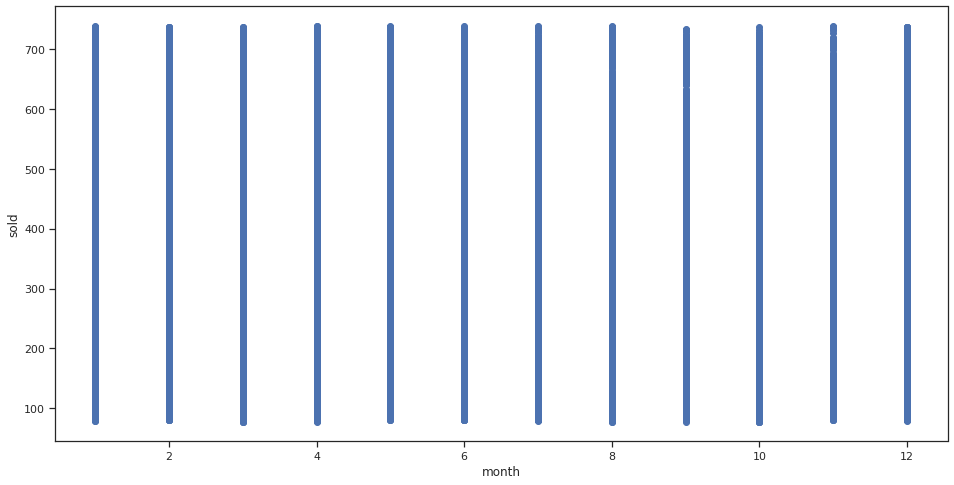

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3['month'],df3['num_sold'])
ax.set_xlabel('month')
ax.set_ylabel('sold')
#plt.show()

<AxesSubplot:>

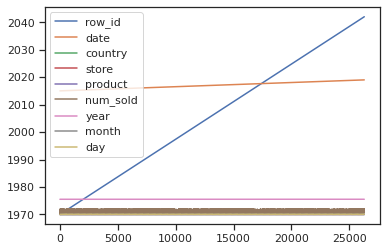

In [45]:
df3.plot()

In [46]:

train=df4.iloc[:17708]
train.head(2)

,row_id,country,store,product,num_sold,year,month,day
0,0,0.0,0.0,1.0,329,2015,1,1
1,1,0.0,0.0,0.0,520,2015,1,1


In [47]:
test=df4.iloc[17708:]
test.shape

(5900, 8)

In [48]:
from sklearn.model_selection import train_test_split
def split(df):
    y = df['num_sold']
    X = df.drop('num_sold',axis=1)
    return y,X



In [49]:
y_train,X_train1=split(train)

In [50]:
y_val,X_val1=split(test)

In [51]:
print('X_train.shape',X_train1.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_val1.shape)
print('y_test.shape',y_val.shape)

X_train.shape (17708, 7)
y_train.shape (17708,)
X_test.shape (5900, 7)
y_test.shape (5900,)


In [52]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
def minmax(X):
    scaler = MinMaxScaler()
    # transform data
    X1 = scaler.fit_transform(X)
    print(X1)
    return X1


In [53]:
X_train=minmax(X_train1)
X_val=minmax(X_val1)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.13795407e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.02759081e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99897241e-01 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 5.33333333e-01]
 [9.99948620e-01 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 5.33333333e-01]
 [1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 5.33333333e-01]]
[[0.00000000e+00 5.00000000e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 5.33333333e-01]
 [1.46348602e-04 5.00000000e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 5.33333333e-01]
 [2.92697205e-04 5.00000000e-01 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 5.33333333e-01]
 ...
 [9.99268257e-01 1.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]

In [54]:

from sklearn.preprocessing import StandardScaler
def stdsc(X2):
    scaler = StandardScaler()
    # transform data
    X3 = scaler.fit_transform(X2)
    print(X3)
    return X3

In [55]:
#X_train=stdsc(X_train1)
#X_val=stdsc(X_val1)


In [56]:
# Split model train test data
#X_train, X_val, y_train, y_val = train_test_split(X1,y, test_size=0.3, random_state=42)

In [57]:
def smape(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    #return accuracy_score(y_val, prediction)
    return 100/len(y_val) * np.sum(2 * np.abs(prediction - y_val) / (np.abs(y_val) + np.abs(prediction)))



In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, RidgeCV, TheilSenRegressor, RANSACRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, StackingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [59]:
model1 = LinearRegression()
model2 = ElasticNet()
model3 =Lasso()
model4= HuberRegressor()
model5= RidgeCV()
model6 = RandomForestRegressor()
model7 = TheilSenRegressor()
model8 = RANSACRegressor()
model9=KNeighborsRegressor()
model10=MLPRegressor()

#models = [model5]
models = [  model1,model2,model3,model5,model6,model7,model8,model9,model10,]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print("ACC: ", smape(model))
    print('done')

Model  1 : LinearRegression()
ACC:  190.46711933243802
done
Model  2 : ElasticNet()
ACC:  36.46079231260888
done
Model  3 : Lasso()
ACC:  22.739404719353605
done
Model  4 : RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
ACC:  37.15466854285059
done
Model  5 : RandomForestRegressor()
ACC:  13.17161886736918
done
Model  6 : TheilSenRegressor(max_subpopulation=10000)
ACC:  189.8639015573107
done
Model  7 : RANSACRegressor()
ACC:  200.0
done
Model  8 : KNeighborsRegressor()
ACC:  13.498745866887122
done
Model  9 : MLPRegressor()
ACC:  16.280383470966445
done


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
def fitAndPredict(model):
    """The following code makes faster to evaluate a model 
    automating the fit and accuracy process"""
    
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    return accuracy_score(y_val, prediction)

In [61]:
#Lets some models
model1 = LogisticRegression()
model2 = GradientBoostingRegressor()
model3 =KNeighborsClassifier()
model4= xgb.XGBClassifier()
model5= RandomForestClassifier()
model6 = RandomForestRegressor()
model7 = GradientBoostingClassifier()
model8 = SGDRegressor()
model9=linear_model.LinearRegression()
model10=DecisionTreeClassifier()
#models = [model5]
models = [  model2,model3,model10,model9]
i = 0
for model in models:
    i +=1
    print("Model ", i,":", model)
    print("ACC: ", smape(model))
    print('done')

Model  1 : GradientBoostingRegressor()
ACC:  14.653287140046677
done
Model  2 : KNeighborsClassifier()
ACC:  19.568856988717588
done
Model  3 : DecisionTreeClassifier()
ACC:  18.822389525271884
done
Model  4 : LinearRegression()
ACC:  190.46711933243802
done


In [62]:
#from sklearn.metrics import mean_absolute_percentage_error

#mean_absolute_percentage_error(y_val,pred)

In [63]:
gradientboost = GradientBoostingRegressor(n_estimators = 300)
from sklearn.model_selection import RandomizedSearchCV
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}


In [64]:
'''# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gradientboost,
            param_distributions=hyperparameter_grid,
            cv=2, n_iter=50,
            n_jobs = 4,
             
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train, y_train)'''

'# Set up the random search with 4-fold cross validation\nrandom_cv = RandomizedSearchCV(estimator=gradientboost,\n            param_distributions=hyperparameter_grid,\n            cv=2, n_iter=50,\n            n_jobs = 4,\n             \n            return_train_score = True,\n            random_state=42)\nrandom_cv.fit(X_train, y_train)'

In [65]:
'''random_cv.best_params_'''

'random_cv.best_params_'

In [66]:
'''print("ACC: ", smape(random_cv))'''

'print("ACC: ", smape(random_cv))'

In [67]:
'''from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}'''

"from sklearn.model_selection import RandomizedSearchCV\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]\n# Number of features to consider at every split\nmax_features = ['auto', 'sqrt']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nrandom_grid = {'n_estimators': n_estimators,\n               'max_features': max_features,\n               'max_depth': max_depth,\n               'min_samples_split': min_samples_split,\n               'min_samples_leaf': min_samples_leaf,\n               'bootstrap': bootstrap}"

In [68]:
'''# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)'''

'# Use the random grid to search for best hyperparameters\n# First create the base model to tune\nrf = RandomForestRegressor()\n# Random search of parameters, using 3 fold cross validation, \n# search across 100 different combinations, and use all available cores\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\n# Fit the random search model\nrf_random.fit(X_train, y_train)'

In [69]:
#rf_random.best_params_

In [70]:
rf=RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 110,
 bootstrap= True)

In [71]:
print("ACC: ", smape(rf))

ACC:  12.790852235867009


In [72]:
test2.shape

(6570, 7)

In [73]:
test2.head(2)

,row_id,country,store,product,year,month,day
0,26298,0.0,0.0,1.0,2019,1,1
1,26299,0.0,0.0,0.0,2019,1,1


In [74]:
y_train

0        329
1        520
2        146
3        572
5        283
        ... 
19459    438
19460    131
19461    458
19462    691
19463    204
Name: num_sold, Length: 17708, dtype: int64

In [75]:
rf.fit(X_train, y_train)
#prediction = model.predict(test2)

RandomForestRegressor(max_depth=110, max_features='sqrt', n_estimators=1000)

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn import set_config
set_config(display='diagram') 

# Model 1 (trend)
from pyearth import Earth

In [77]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 100]
}
gsearch = GridSearchCV(estimator = 
XGBClassifier(learning_rate =0.1,
              n_estimators=10,
              max_depth=5,
              min_child_weight=2,
              gamma=0.1,
              subsample=0.85,
              colsample_bytree=0.8,
              objective= 'binary:logistic',
              nthread=4,
              scale_pos_weight=1,
              seed=27), 
              param_grid = param_test,
              scoring='roc_auc',
              n_jobs=4,
              iid=False, 
              cv=2,
              verbose=10)
gsearch.fit(X_train,y_train)'''

"from xgboost import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\nparam_test = {\n    'reg_alpha':[1e-5, 1e-2, 0.1, 100]\n}\ngsearch = GridSearchCV(estimator = \nXGBClassifier(learning_rate =0.1,\n              n_estimators=10,\n              max_depth=5,\n              min_child_weight=2,\n              gamma=0.1,\n              subsample=0.85,\n              colsample_bytree=0.8,\n              objective= 'binary:logistic',\n              nthread=4,\n              scale_pos_weight=1,\n              seed=27), \n              param_grid = param_test,\n              scoring='roc_auc',\n              n_jobs=4,\n              iid=False, \n              cv=2,\n              verbose=10)\ngsearch.fit(X_train,y_train)"

In [78]:
#fitAndPredict(clf)
#rf.fit(X_train,y_train)

In [79]:
test2.max()

row_id     32867.0
country        2.0
store          1.0
product        2.0
year        2019.0
month         12.0
day           31.0
dtype: float64

In [80]:
#prediction

In [81]:
test.shape

(5900, 8)

In [82]:
predict = rf.predict(test2)

output = pd.DataFrame({'row_id': test_df.row_id, 'num_sold': predict})
output.to_csv('submission.csv' , index=False)
print("Submission saved")

Submission saved


In [83]:
#output.to_csv('file1.csv')

In [84]:

type(predict)

numpy.ndarray

In [85]:
output

,row_id,num_sold
0,26298,163.001
1,26299,433.902
2,26300,163.001
3,26301,266.186
4,26302,583.290
...,...,...
6565,32863,424.708
6566,32864,178.099
6567,32865,288.620
6568,32866,612.532
